<a href="https://colab.research.google.com/github/DonRoboto/MOO_v1/blob/main/T2_P2_P3_DESC_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import random
from sympy import *
import matplotlib.pyplot as plt
import scipy, pylab
import pandas as pd

In [36]:
p_1 = [i/10 for i in range(0, 11)]
p_2=[]

for i in range(len(p_1)):
  p_2.append(round(1-p_1[i],2))


In [37]:

x_1 = Symbol('x_1')
x_2 = Symbol('x_2')

#𝐹(𝑥_1,𝑥_2 ) = (𝑥_1−1)^2+(𝑥_2−1)^4; (𝑥_1+1)^2+(𝑥_2+1)^2] con 𝒳=[−3, 3]×[−3, 3] 

func_P1_F1 = (x_1-1)**2 + (x_2-1)**4
func_P1_F2 = (x_1+1)**2 + (x_2+1)**2

gamma = 0.7 
func_P2_F1 = 0.5 * (( ( 1 + (x_1 + x_2)**2 )**0.5 ) + ( ( 1 + (x_1 - x_2)**2 )**0.5 ) + x_1 - x_2) + gamma * exp(-(x_1-x_2)**2)
func_P2_F2 = 0.5 * (( ( 1 + (x_1 + x_2)**2 )**0.5 ) + ( ( 1 + (x_1 - x_2)**2 )**0.5 ) - x_1 + x_2) + gamma * exp(-(x_1-x_2)**2)


In [38]:

def Gradient(fx, X):
  return np.array( [ [fx.diff(x_1).subs( [(x_1, float(X[0])), (x_2, float(X[1]))]  )], [fx.diff(x_2).subs( [(x_1, float(X[0])), (x_2, float(X[1]))]  ) ] ] )  


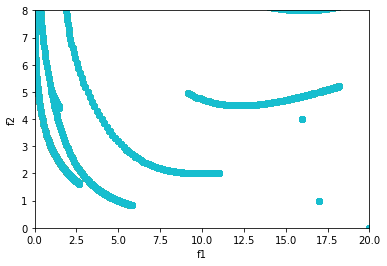

In [39]:

report_csv = []

ax = pylab.subplot(111)

graph1=[]
graph2=[]

#vector de referencia
d = np.array([[-1],[-1]]).T

for k in range(100):
  #puntos de evaluacion X0
  xv0 = random.randint(-3, 3)
  xv1 = random.randint(-3, 3)
  X1 = np.array([[xv0], [xv1]])

  #gradiente1
  grad1 = Gradient(func_P1_F1, X1)
  xg1_1 = float(grad1[0][0])
  xg1_2 = float(grad1[1][0])
  ev1 = func_P1_F1.subs([ (x_1, float(xg1_1)), (x_2, float(xg1_2)) ] )

  grad2 = Gradient(func_P1_F2, X1)
  xg2_1 = float(grad2[0][0])
  xg2_2 = float(grad2[1][0])
  ev2 = func_P1_F2.subs([ (x_1, float(xg2_1)), (x_2, float(xg2_2)) ] )

  m=np.array([[float(ev1), float(ev2)]])

  #pseudo inversa
  pinv = np.linalg.pinv(m)

  res=np.matmul(d, pinv)

  v = res[0][0]

  xv0_1 = xv0 + v
  xv1_1 = xv1 + v

  X1_1 = np.array([[xv0_1], [xv1_1]])

  ra = func_P1_F1.subs([ (x_1, float(X1_1[0])), (x_2, float(X1_1[1])) ] )
  rb = func_P1_F2.subs([ (x_1, float(X1_1[0])), (x_2, float(X1_1[1])) ] )

  graph1.append(ra)
  graph2.append(rb)

  for i in range(100):
    grad1 = Gradient(func_P1_F1, X1_1)
    xg1_1 = float(grad1[0][0])
    xg1_2 = float(grad1[1][0])
    ev1 = func_P1_F1.subs([ (x_1, float(xg1_1)), (x_2, float(xg1_2)) ] )

    grad2 = Gradient(func_P1_F2, X1_1)
    xg2_1 = float(grad2[0][0])
    xg2_2 = float(grad2[1][0])
    ev2 = func_P1_F2.subs([ (x_1, float(xg2_1)), (x_2, float(xg2_2)) ] )

    m=np.array([[float(ev1), float(ev2)]])

    #pseudo inversa
    pinv = np.linalg.pinv(m)

    res=np.matmul(d, pinv)

    v  = res[0][0]

    xv0_1 = xv0_1 + v
    xv1_1 = xv1_1 + v

    X1_1 = np.array([[xv0_1], [xv1_1]])

    ra = func_P1_F1.subs([ (x_1, float(X1_1[0])), (x_2, float(X1_1[1])) ] )
    rb = func_P1_F2.subs([ (x_1, float(X1_1[0])), (x_2, float(X1_1[1])) ] )

    graph1.append(ra)
    graph2.append(rb)

    plt.scatter(graph1, graph2)

    report_csv.append([k, i, ra, rb])


ax.set_xlabel('f1')
ax.set_ylabel('f2')



plt.xlim(0, 20)
plt.ylim(0, 8)
plt.show()

In [40]:

df = pd.DataFrame(report_csv)

df.to_csv('t2_p2.csv')

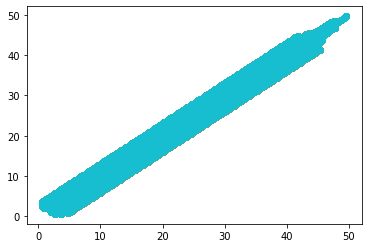

In [41]:
report_csv = []

ax = pylab.subplot(111)

graph1=[]
graph2=[]

#vector de referencia
d = np.array([[-1],[-1]]).T

for k in range(100):
  #puntos de evaluacion X0
  xv0 = random.randint(-2, 2)
  xv1 = random.randint(-2, 2)
  X1 = np.array([[xv0], [xv1]])

  #gradiente1
  grad1 = Gradient(func_P2_F1, X1)
  xg1_1 = float(grad1[0][0])
  xg1_2 = float(grad1[1][0])
  ev1 = func_P2_F1.subs([ (x_1, float(xg1_1)), (x_2, float(xg1_2)) ] )

  grad2 = Gradient(func_P1_F2, X1)
  xg2_1 = float(grad2[0][0])
  xg2_2 = float(grad2[1][0])
  ev2 = func_P2_F2.subs([ (x_1, float(xg2_1)), (x_2, float(xg2_2)) ] )

  m=np.array([[float(ev1), float(ev2)]])

  #pseudo inversa
  pinv = np.linalg.pinv(m)

  res=np.matmul(d, pinv)

  v = res[0][0]

  xv0_1 = xv0 + v
  xv1_1 = xv1 + v

  X1_1 = np.array([[xv0_1], [xv1_1]])

  ra = func_P2_F1.subs([ (x_1, float(X1_1[0])), (x_2, float(X1_1[1])) ] )
  rb = func_P2_F2.subs([ (x_1, float(X1_1[0])), (x_2, float(X1_1[1])) ] )

  graph1.append(ra)
  graph2.append(rb)

  for i in range(100):
    grad1 = Gradient(func_P2_F1, X1_1)
    xg1_1 = float(grad1[0][0])
    xg1_2 = float(grad1[1][0])
    ev1 = func_P2_F1.subs([ (x_1, float(xg1_1)), (x_2, float(xg1_2)) ] )

    grad2 = Gradient(func_P2_F2, X1_1)
    xg2_1 = float(grad2[0][0])
    xg2_2 = float(grad2[1][0])
    ev2 = func_P2_F2.subs([ (x_1, float(xg2_1)), (x_2, float(xg2_2)) ] )

    m=np.array([[float(ev1), float(ev2)]])

    #pseudo inversa
    pinv = np.linalg.pinv(m)

    res=np.matmul(d, pinv)

    v  = res[0][0]

    xv0_1 = xv0_1 + v
    xv1_1 = xv1_1 + v

    X1_1 = np.array([[xv0_1], [xv1_1]])

    ra = func_P2_F1.subs([ (x_1, float(X1_1[0])), (x_2, float(X1_1[1])) ] )
    rb = func_P2_F2.subs([ (x_1, float(X1_1[0])), (x_2, float(X1_1[1])) ] )

    graph1.append(ra)
    graph2.append(rb)

    plt.scatter(graph1, graph2)


    report_csv.append([k, i, ra, rb])



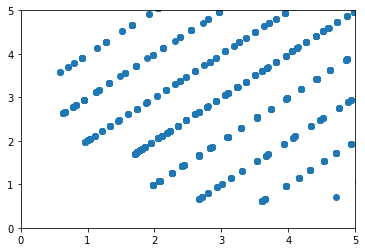

In [44]:
plt.scatter(graph1, graph2)

ax.set_xlabel('f1')
ax.set_ylabel('f2')

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()

In [43]:

df = pd.DataFrame(report_csv)

df.to_csv('t2_p3.csv')